In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hilde.helpers.sobol import RandomState
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
import hilde
hilde.__file__

'/home/floyd/local/hilde/hilde/__init__.py'

In [3]:
nsamples = 200
nmax = 1000

In [4]:
rng = RandomState(dimension=2, seed=3, failsafe=False, randomize=True)



# The Sobol numbers are created by a code that is based 
# on the Sobol sequence generator by Frances Y. Kuo and Stephen Joe. 
# Copyright (c) 2008, Frances Y. Kuo and Stephen Joe
# All rights reserved.
# More info: https://web.maths.unsw.edu.au/~fkuo/sobol/




In [5]:
# the two are equivalent because `RandomState` was initialized with `dimension=2`
# qseq = rng.rand(nsamples, 2)
qseq = rng.rand(2 * nsamples).reshape((nsamples, 2))
qseq[:3]

array([[0.64982644, 0.55802957],
       [0.14982644, 0.05802957],
       [0.18107644, 0.52677957]])

In [6]:
qseq[:3], qseq.shape

(array([[0.64982644, 0.55802957],
        [0.14982644, 0.05802957],
        [0.18107644, 0.52677957]]), (200, 2))

In [7]:
pseq = np.random.rand(nsamples, 2)
pseq[:3], pseq.shape

(array([[0.83994904, 0.12132858],
        [0.56931133, 0.43706194],
        [0.01874801, 0.04063074]]), (200, 2))

In [8]:
def idx(nsamples, seed=14, low=100, nmax=nmax):
    np.random.seed(seed)
    idx = np.random.randint(low=low, high=nmax, size=2*nsamples)
    return np.unique(idx)[:nsamples]
idx(nsamples)[:10], len(np.unique(idx(nsamples)))

(array([102, 107, 108, 112, 115, 118, 119, 122, 125, 126]), 200)

In [9]:
pqseq = rng.rand(nmax, 2)[idx(nsamples)]
pqseq[:10], pqseq.shape

(array([[0.96210188, 0.86835188],
        [0.27460188, 0.55585188],
        [0.52460188, 0.80585188],
        [0.14960188, 0.93085188],
        [0.18085188, 0.39960188],
        [0.05585188, 0.77460188],
        [0.55585188, 0.27460188],
        [0.74335188, 0.58710188],
        [0.99335188, 0.33710188],
        [0.86835188, 0.96210188]]), (200, 2))

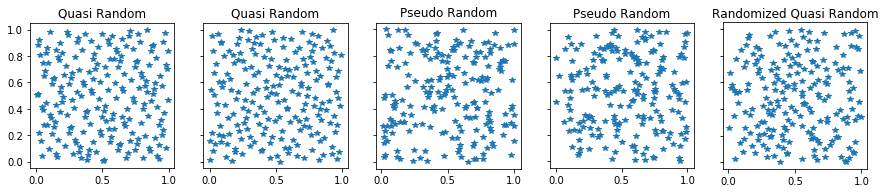

In [10]:
np.random.seed(105)
ri = lambda nmax: np.random.randint(low=200, high=nmax)

fig, axs = plt.subplots(ncols=5, sharey=True, 
                        subplot_kw={'aspect': 1}, 
                        figsize=2*(15,))
axs[0].plot(*qseq[-nsamples:].T, '*')
axs[0].set_title('Quasi Random')
axs[1].plot(*rng.rand(nsamples, 2).T, '*')
axs[1].set_title('Quasi Random')
axs[2].plot(*pseq.T, '*')
axs[2].set_title('Pseudo Random')
axs[3].plot(*np.random.rand(nsamples, 2).T, '*')
axs[3].set_title('Pseudo Random')
axs[4].plot(*pqseq.T, '*')
axs[4].set_title('Randomized Quasi Random')

plt.show()

## What happens if one initializes the dimension incorrectly?
Example: initialize with `dimension=3` but use 2x1 samples as before



# The Sobol numbers are created by a code that is based 
# on the Sobol sequence generator by Frances Y. Kuo and Stephen Joe. 
# Copyright (c) 2008, Frances Y. Kuo and Stephen Joe
# All rights reserved.
# More info: https://web.maths.unsw.edu.au/~fkuo/sobol/




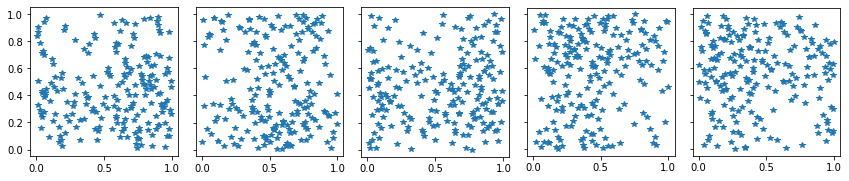

In [11]:
rng = RandomState(dimension=3, seed=3, failsafe=False)

nfig = 5
fig, axs = plt.subplots(ncols=nfig, sharey=True,
                        subplot_kw={'aspect': 1}, 
                        figsize=(12, 8))
for ii in range(0, nfig):
    axs[ii].plot(*rng.rand(nsamples, 2).T, '*')

# fig.suptitle('Quasi Random with wrong initializer')

plt.tight_layout()
plt.show()